<a href="https://colab.research.google.com/github/ez-zee/Machine-Learning-Python/blob/main/Multi_layer_Perceptron_(MLP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Загрузка данных
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Нормализация и преобразование данных
X_train = X_train.reshape(-1, 28*28).astype('float32') / 255.0  # [0, 1]
X_test = X_test.reshape(-1, 28*28).astype('float32') / 255.0

# One-hot кодирование меток
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from tensorflow.keras.models import Sequential    # Последовательная модель
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    # Входной слой (784 входа) -> Скрытый слой (128 нейронов, ReLU)
    Dense(128, activation='relu', input_shape=(784,)),
    Dropout(0.2),  # Регуляризация (отключает 20% нейронов для борьбы с переобучением)

    # Выходной слой (10 нейронов, softmax)
    Dense(10, activation='softmax')
])

# Компиляция модели
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2  # 20% данных для валидации
)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8450 - loss: 0.5322 - val_accuracy: 0.9553 - val_loss: 0.1577
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9498 - loss: 0.1728 - val_accuracy: 0.9644 - val_loss: 0.1228
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9642 - loss: 0.1233 - val_accuracy: 0.9694 - val_loss: 0.1013
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9703 - loss: 0.0959 - val_accuracy: 0.9715 - val_loss: 0.0939
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9752 - loss: 0.0808 - val_accuracy: 0.9753 - val_loss: 0.0809
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9789 - loss: 0.0675 - val_accuracy: 0.9739 - val_loss: 0.0834
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9806 - loss: 0.0603 - val_accuracy: 0.9774 - val_loss: 0.0851
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9853 - loss: 0.048

In [ ]:
# Точность на тестовых данных
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")  # Пример: 0.9768

# Предсказание для одного изображения
import numpy as np
sample = X_test[0].reshape(1, -1)  # Берем первый пример из теста
prediction = model.predict(sample)
print(f"Предсказанная цифра: {np.argmax(prediction)}")  # Например, "7"

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9736 - loss: 0.0938
Test Accuracy: 0.9775
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Предсказанная цифра: 7


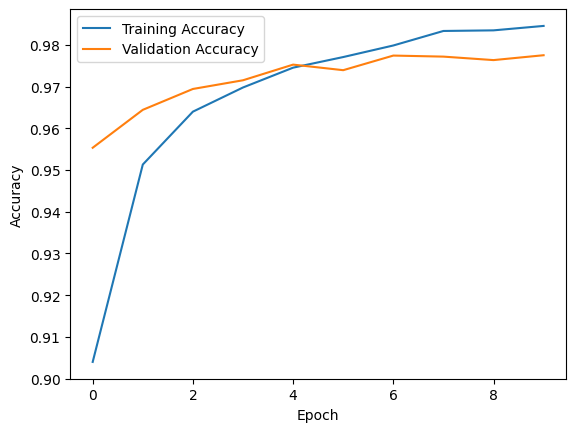

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8432 - loss: 0.5301 - val_accuracy: 0.9553 - val_loss: 0.1587
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9492 - loss: 0.1702 - val_accuracy: 0.9655 - val_loss: 0.1143
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9650 - loss: 0.1193 - val_accuracy: 0.9697 - val_loss: 0.1024
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9713 - loss: 0.0957 - val_accuracy: 0.9727 - val_loss: 0.0921
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9772 - loss: 0.0796 - val_accuracy: 0.9750 - val_loss: 0.0833
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9790 - loss: 0.0691 - val_accuracy: 0.9753 - val_loss: 0.0843
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9810 - loss: 0.0585 - val_accuracy: 0.9751 - val_loss: 0.0836
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9830 - loss: 0.05

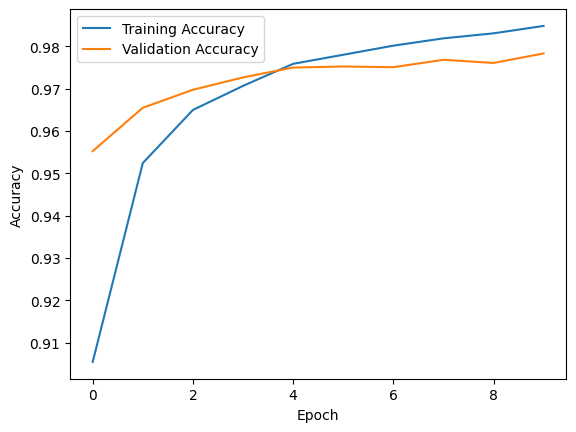

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential    # Последовательная модель
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt


# Загрузка данных
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Нормализация и преобразование данных
X_train = X_train.reshape(-1, 28*28).astype('float32') / 255.0  # [0, 1]
X_test = X_test.reshape(-1, 28*28).astype('float32') / 255.0

# One-hot кодирование меток
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Создание модели
model = Sequential([
    # Входной слой (784 входа) -> Скрытый слой (128 нейронов, ReLU)
    Dense(128, activation='relu', input_shape=(784,)),
    Dropout(0.2),  # Регуляризация (отключает 20% нейронов для борьбы с переобучением)

    # Выходной слой (10 нейронов, softmax)
    Dense(10, activation='softmax')
])

# Компиляция модели
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# Обучение модели
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2  # 20% данных для валидации
)

# Оценка на тестовых данных
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")  # Пример: 0.9768

# Предсказание для одного изображения
sample = X_test[0].reshape(1, -1)  # Берем первый пример из теста
prediction = model.predict(sample)
print(f"Предсказанная цифра: {np.argmax(prediction)}")  # Например, "7"

# Визуализация
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()